In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import os
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [5]:
os.chdir('/Users/ruddysimonpour/Desktop/Vehicle_price_prediction/')
data = pd.read_csv('Automobile_price_data.csv')

In [6]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In above summary, we can see various columns with basic statistical details like `mean`, `max`, `min`, `standard deviation`, and etc, which help us to have statistical overview about our data.

## Recode the column names
Notice that some of the columns names have this ('-') character and it's hard for python to recognize this characters

In [8]:
data.columns = [str.replace('-','_') for str in data.columns]

In [9]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

## Exploring The Dataset

In [10]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Why Data Exploration? To understand the content and relationship in the dataset. Avoid issues when training and deploying machine learning models.

## Missing values

In [11]:
data.isnull().any()

symboling            False
normalized_losses    False
make                 False
fuel_type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

Missing values are defined as data values that are not stored and handled properly from peoples and researchers. Missing values are a common issue for Data Scientists which can effect on their methods, algorithms, and conclusions. There are different solutions for data cleansing depending on problems. Use exploration to detect the problem.

`Treatment Strategies:` 
- Remove columns with mostly missing values.
- If few rows, remove.
- Forward or Backward fill.
- Impute; mean, median, trend, etc.



### Handling missing values in this dataset
We notice that missing values are not coded with 'NaN' values. Missing values in this dataset are coded by this ('?') character. We need to eliminate the rows that they contain '?' character.

In [12]:
(data.astype(np.object) == '?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

We notice that some of our columns contain '?' character.

In [21]:
for col in data.columns:
    if data[col].dtype == object:
        count = 0
        for i in data[col]:
            if i == '?':
                count+=1
        print(col,count)

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


As we can see `normalized_losses`, `num_of_doors`, `bore`, `stroke`, `horsepower`, `peak_rpm`, and `price` have missing values and `normalize_losses` has significant number of missing values and we need to remove it. 

In [64]:
del data['normalized_losses']

In [65]:
data

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [46]:
# Removing rows with missing values
cols = ['num_of_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for columns in cols:
    data.loc[data[columns] == '?', columns] = np.nan
data.dropna(axis = 0, inplace = True)
data.shape

(193, 26)

In [47]:
## Convert some columns to numeric values
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
for i in cols:
    data[i] = pd.to_numeric(data[i])

In [49]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

## Visualizing Dataset for Regression

### Bar Plot

We're going to look on few columns that are categorical variables such as: `make`, `body_style`, `number of cylinders`, and etc.

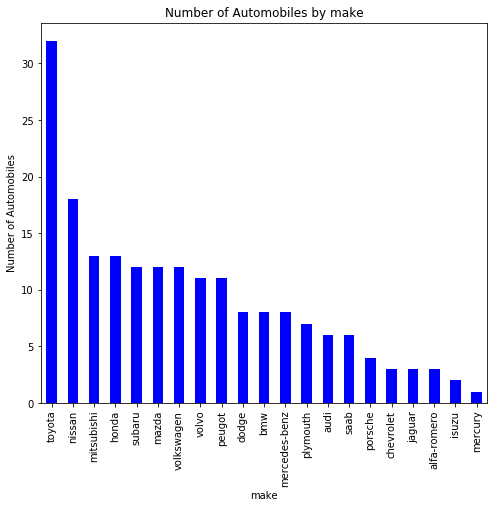

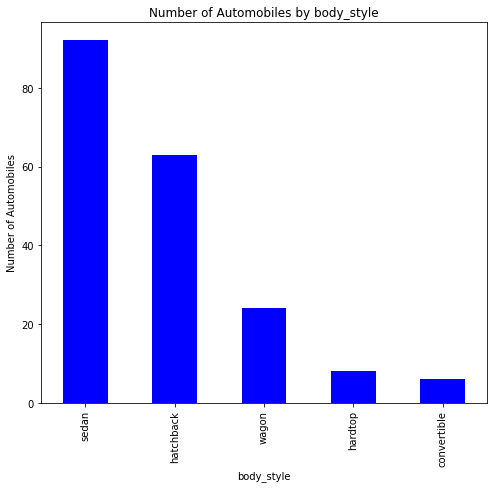

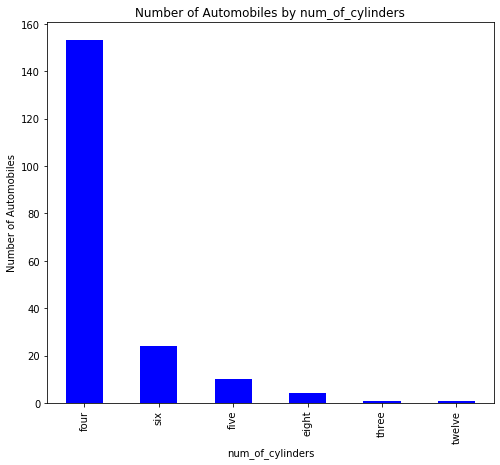

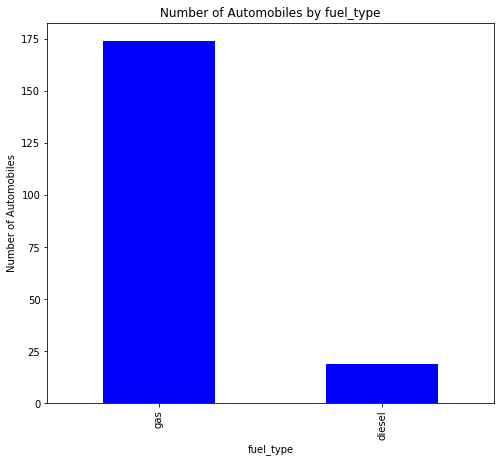

In [50]:
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize = (8,7)) #define the plot area
        ax = fig.gca()
        counts = data[col].value_counts()
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of Automobiles by'+ ' '+ col)
        ax.set_xlabel(col)
        ax.set_ylabel("Number of Automobiles")
        plt.show()
plot_cols = ['make', 'body_style', 'num_of_cylinders','fuel_type' ]
plot_bars(data, plot_cols)

So we can see from the first plot that Toyota has the most frequency in the dataset and we can see similar thing in second bar plot which is `body_style` and Sedans are the most frequent than Hatchbacks, Wagons, Hardtops, and Convertible. Similarly in the `number_of_cylinders`, there is exactly one car with 12 cylinder and one car with three cylinder.So, there is no difference. Finally, in the last bar plot we can notice that gas type are the most frequent than diesel type.

### Histograms

For numeirc values, we need to use histograms. A histogram looks seemingly like a bar chart, however it's a different because it has a bin. Imagine that the numeric values are binned within equal width bins. 

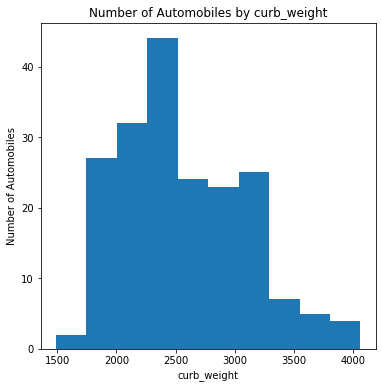

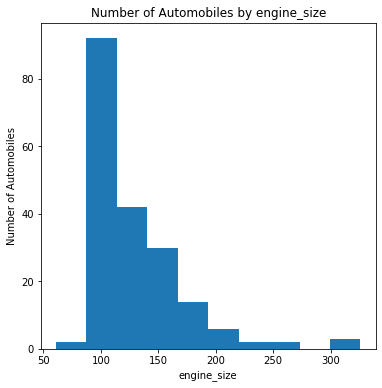

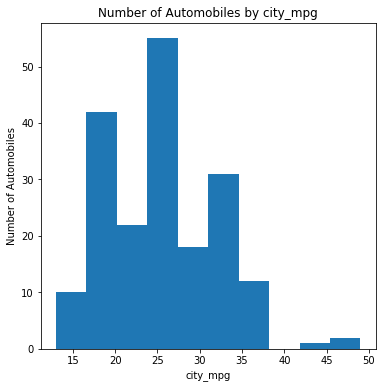

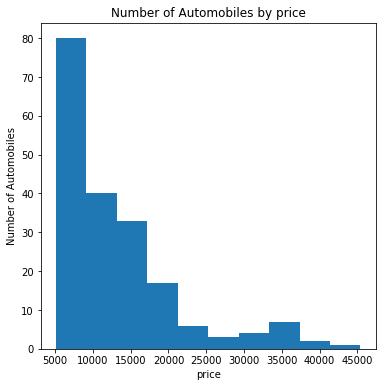

In [51]:
def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize = (6,6)) # define the plt area
        ax = fig.gca()
        data[col].plot.hist(ax = ax, bins = bins)
        ax.set_title('Number of Automobiles by'+ ' '+ col)
        ax.set_xlabel(col)
        ax.set_ylabel("Number of Automobiles")
        plt.show()
num_cols = ['curb_weight', 'engine_size', 'city_mpg','price']    
plot_histogram(data, num_cols)

We can understand from this histogram plots that they're not exactly a bell-shaped curve. what we can see is that there's a little bits what we call `right-skewed`, the `tail` seems to be more on the `right` and the `bulk` of the distribution or the mode seems to be to the `left`. This skewed distribution will affect the statistics of any machine learning model.

## Two Dimensional plots

Two dimensional plots can help us to find the relationship between two numeric feature in the label or two numeric features.

### Scatter Plots


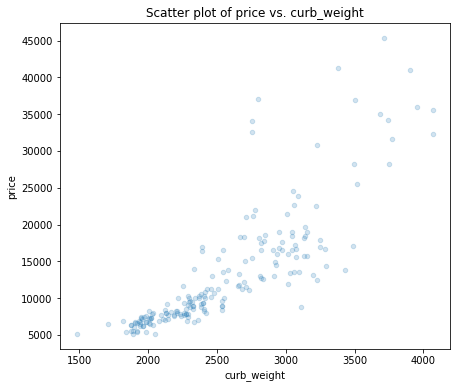

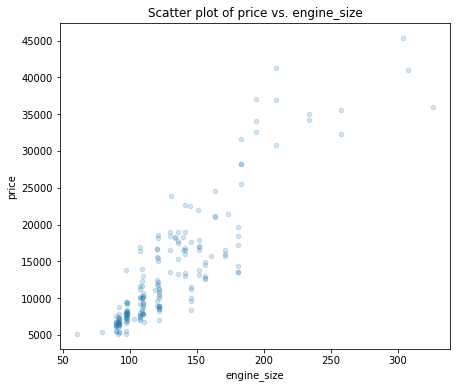

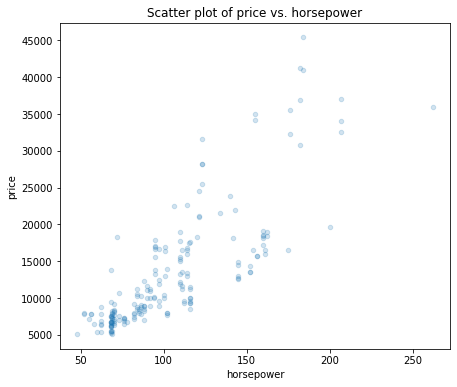

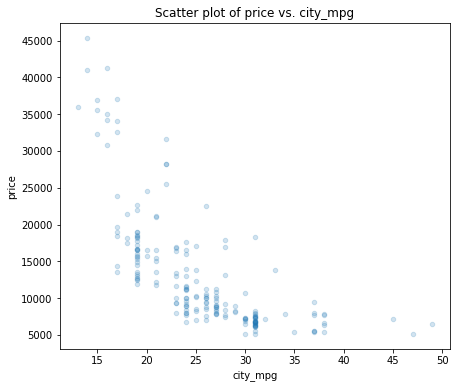

In [55]:
def plot_scatter_t(data, cols, col_y = 'price', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        data.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter_t(data, num_cols, alpha = 0.2) 

1- So as we can see the first plot is curb_weight versus price while it makes sense right, because heavier cars cost more, but we also see more intersting structure that group of cars in the right side of the plot are not following the trend of this main group. For instance we have some mid range of cars that are quit expensive. That's why data exploration is vital part of data analysis and we need to invistigate that part. 

2- For the second plot we have the same view, we've got a trend but there are some odd balls that very small engine size cars seems to be not really on the trend and also we have cars with big engine size on the right side of the plot that are also off by themselves and not on the trend line. Additionally, we have the same views for third and forth plot as well and we need some data exploration to find out why some values are not on the trend line. 

## Relation between numeric and categorical values

### Box Plots
A Box Plots is a way to summarize the distribution of a numeric variable. But the intersting thing is that you can arrange box plots by categories of a categorical variable.
We have a long list of categorical variables here such as fuel type, aspiration, number of doors, and etc. 

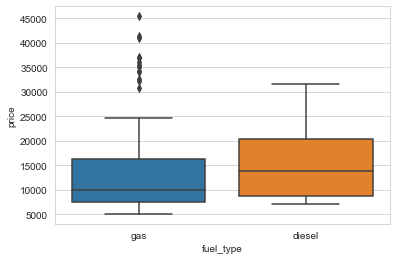

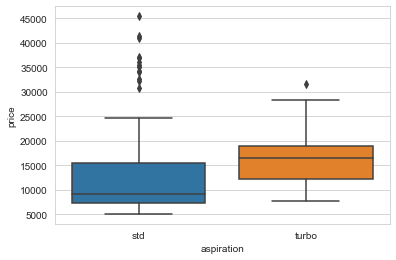

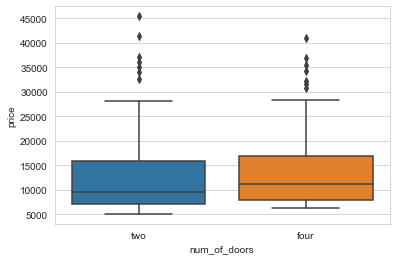

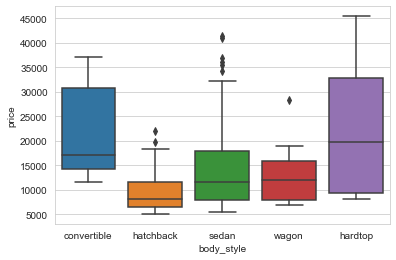

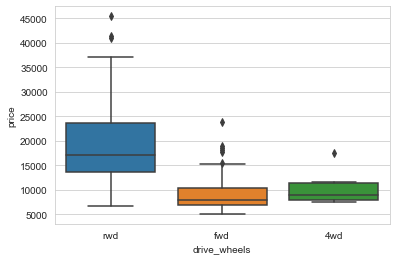

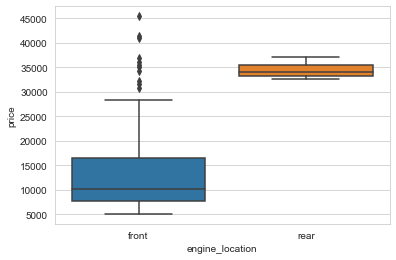

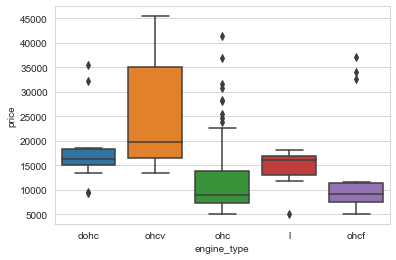

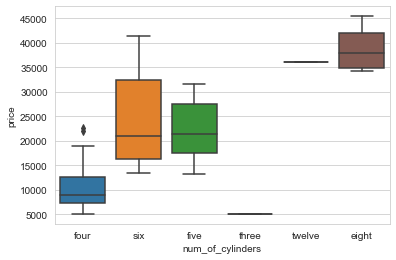

In [56]:
def plot_box(data, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=data)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()

categorical_cols = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders']
plot_box(data, categorical_cols)
        

So what we can understand from these box plots? From the first box_plot which is price versus fuel_type, what we can see from the **gas** type is that they have inner two core tiles of the data. So there's half the data values are within the box. So we have **25 percent quartile** on the bottom and **75 percent quartile** accros the top and the and we have dark line in the middle of the box which is the **Median** or **50 percent quartile**. Also we can see small black diamonds on the top of the box plot for the gas type, and they're are outliers which it means that they're outside of this normal range. So the question is what we get out of this box plot? How much overlap there is between these two distribution? what we can see that most of the distribution of the gas cars, half the values have to be below the median, it means that they're actually down in the price range of maybe about a quarter of the diesel and a lot of diesel cars are more expensive